In [1]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [2]:
file = open('ex1data1.txt', 'r')
lines = file.read().splitlines()

org_x = list(map(lambda l: round(float(l.split(',')[0]),4), lines))
org_y = list(map(lambda l: round(float(l.split(',')[1]),4), lines))

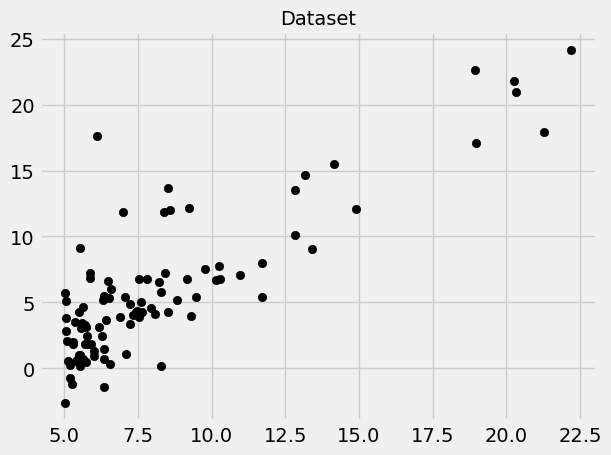

In [3]:
plt.style.use('fivethirtyeight')
plt.scatter(np.array(org_x), np.array(org_y), color='black')
plt.gca().set_title("Dataset",fontsize = 14)

plt.show()

In [4]:
normalized_x = []
normalized_y = []

max_x = max(org_x)
min_x = min(org_x)

for x in org_x:
    normalized_x.append((x - min_x)/(max_x - min_x))

max_y = max(org_y)
min_y = min(org_y)

for y in org_y:
    normalized_y.append((y - min_y)/(max_y - min_y))

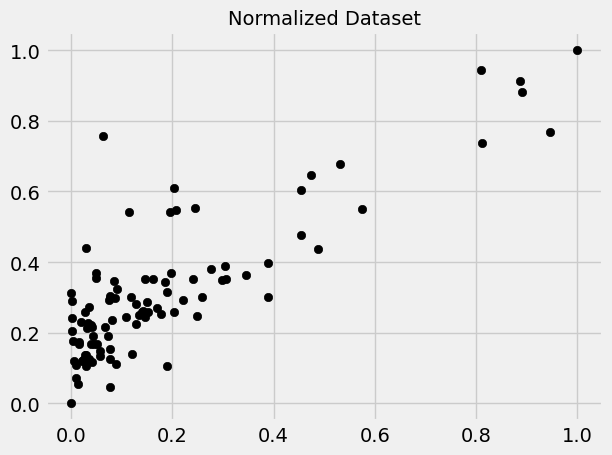

In [5]:
plt.scatter(np.array(normalized_x), np.array(normalized_y), color='black')
plt.gca().set_title("Normalized Dataset",fontsize = 14)

plt.show()

In [6]:
x = np.array(normalized_x) 
y = np.array(normalized_y)

In [7]:
def predict(x, theta0, theta1):
    return theta1*x + theta0

def cost(x, y, theta0, theta1):
    m = x.shape[0]

    summation = 0
    for it in range(m):
        summation += ((predict(x[it],theta0, theta1) - y[it])**2)
    
    J = (1/(2*m)) * summation
    return J


def fit(x, y, theta0, theta1, iterations, learning_rate):
    m = x.shape[0]
    costs = []
    costs.append(cost(x,y,theta0,theta1))
    
    for _ in range(iterations):

        summation = 0
        for it in range(m):
            summation += (predict(x[it],theta0, theta1) - y[it])
        theta0 = theta0 - (learning_rate * (1/m) * summation)

        summation = 0
        for it in range(m):
            summation += ((predict(x[it],theta0, theta1) - y[it])* x[it])
        theta1 = theta1 - (learning_rate * (1/m) * summation) 
        
        costs.append(cost(x,y,theta0,theta1))
        
    return theta0, theta1, costs


In [8]:
def draw_plot(x, y, theta0, theta1, iterations, costs):
    plt.scatter(x, y, color='black')
    plt.plot(x, predict(x, theta0, theta1))
    plt.gca().set_title("Linear Regressor Problem",fontsize = 14)

    plt.show()

    # plt.scatter(np.arange(iterations), costs, color='black')
    plt.plot(np.arange(iterations+1), costs)
    plt.gca().set_title("J(Q) vs Iteration",fontsize = 14)

    plt.show()

def train(x, y, initial_theta0, initial_theta1, iterations, learning_rate):
    theta0, theta1, costs = fit(x, y, initial_theta0, initial_theta1, iterations, learning_rate)

    print(" theta0:", theta0, "\n", "theta1:", theta1)
    draw_plot(x, y, theta0, theta1, iterations, costs)

    return theta0, theta1

 theta0: 0.17799346832448676 
 theta1: 0.7651883121172038


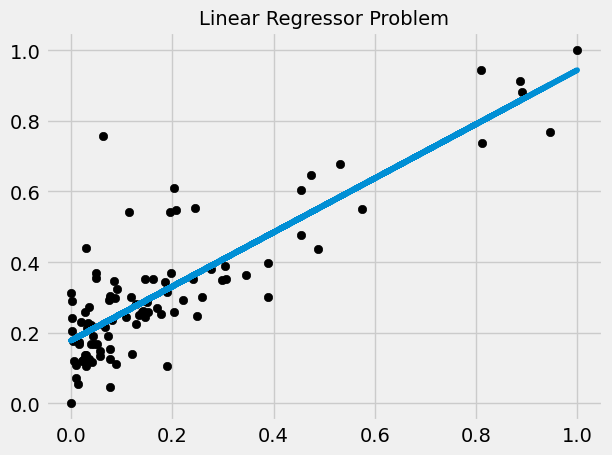

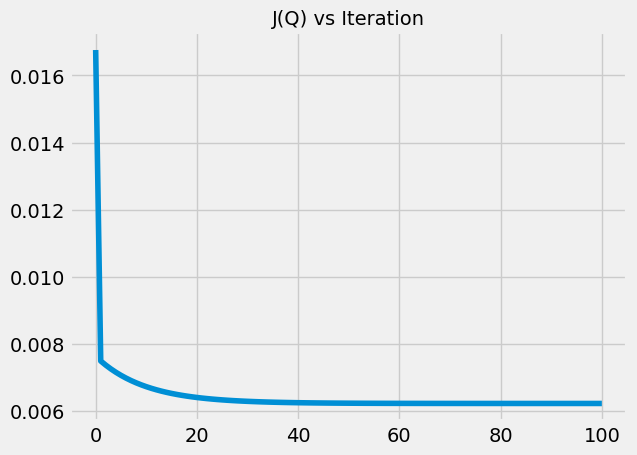

(0.17799346832448676, 0.7651883121172038)

In [9]:
train(x, y, initial_theta0= 0, initial_theta1= 1, iterations= 100, learning_rate= 1)
# validate(18.945, theta0, theta1)

 theta0: 0.14784893090071002 
 theta1: 0.9223951367017054


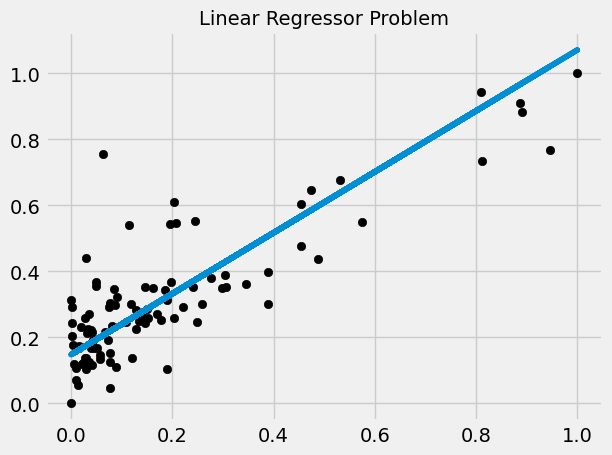

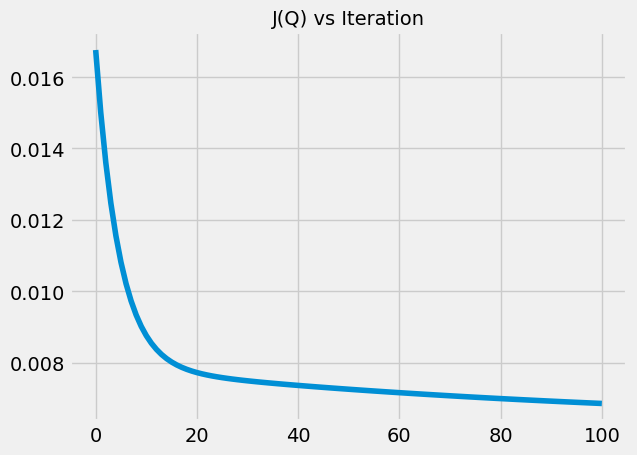

(0.14784893090071002, 0.9223951367017054)

In [10]:
train(x, y, initial_theta0= 0, initial_theta1= 1, iterations= 100, learning_rate= 0.1)
# validate(18.945, theta0, theta1)

 theta0: 0.0853265576831997 
 theta1: 1.003393264940623


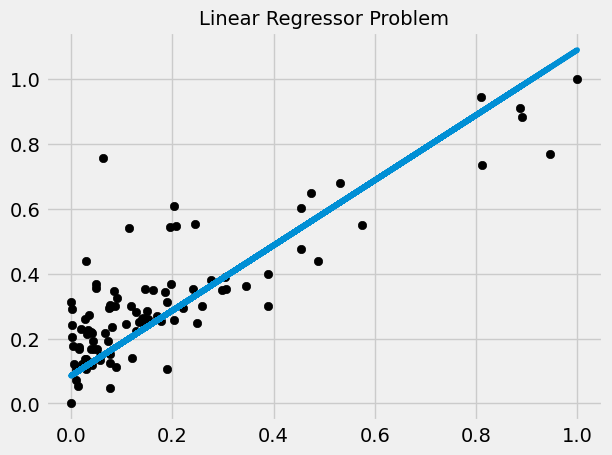

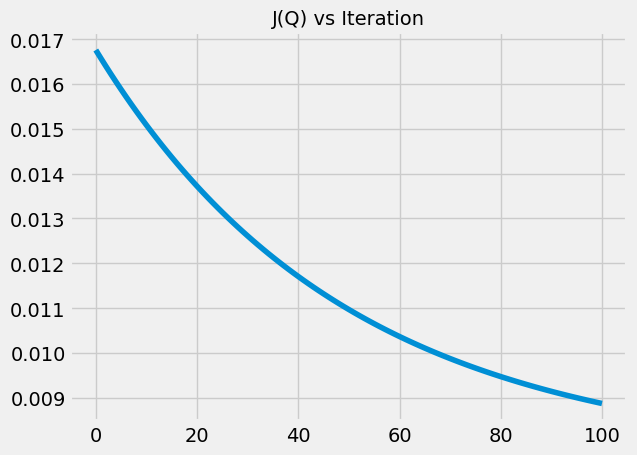

(0.0853265576831997, 1.003393264940623)

In [11]:
train(x, y, initial_theta0= 0, initial_theta1= 1, iterations= 100, learning_rate= 0.01)

 theta0: 0.17786706952070017 
 theta1: 0.7658500555862408


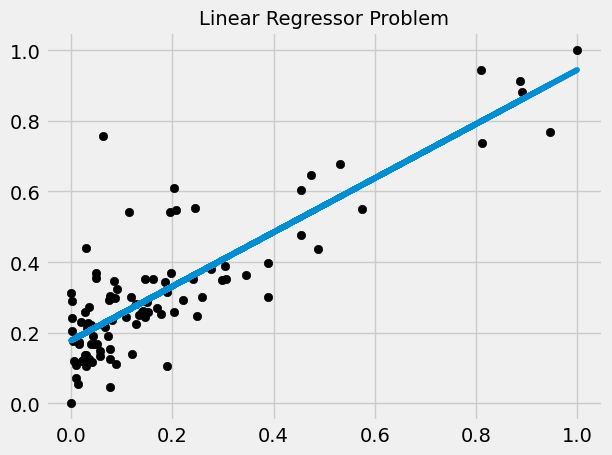

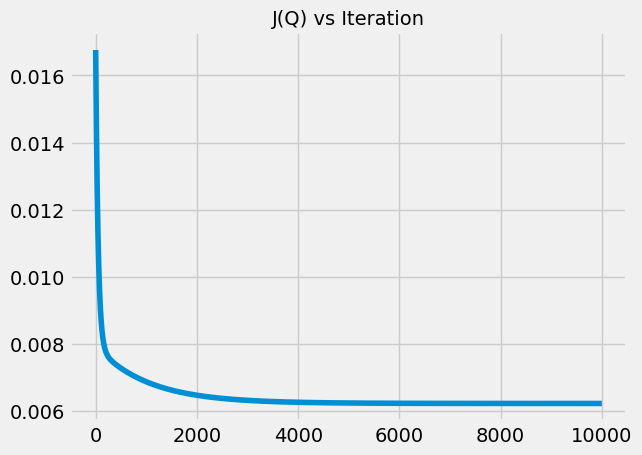

In [12]:
th0, th1 = train(x, y, initial_theta0= 0, initial_theta1= 1, iterations= 10000, learning_rate= 0.01)

In [13]:
value = 22.203
normalized = (value - min_x) / (max_x - min_x)
normalized_result = predict(normalized,th0, th1)
denormalize_result = normalized_result * (max_y - min_y) + min_y
denormalize_result

22.637059917231483